In [1]:
import pandas as pd
import numpy as np
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
# Load the dataset
database = pd.read_csv("Language Detection.csv")

In [4]:
# Basic info about the dataset
print("Dataset Overview:")
print(database.head())
print("\nLanguage Distribution:")
print(database['Language'].value_counts())

Dataset Overview:
                                                Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English

Language Distribution:
Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64


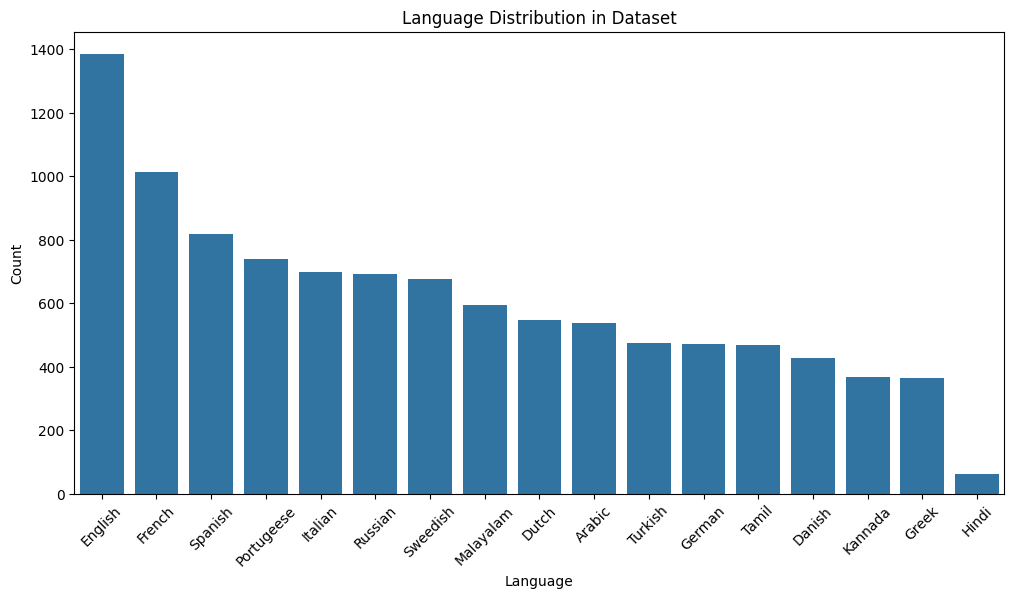

In [5]:
# Plot the language distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=database, x="Language", order=database["Language"].value_counts().index)
plt.title("Language Distribution in Dataset")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [6]:
# Preprocess the text by removing punctuation and converting to lowercase
database["Text"] = database["Text"].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)).lower())

In [7]:
# Split the database into training and testing sets
train_data, test_data = train_test_split(database, test_size=0.2, random_state=42)

In [8]:
# Initialize a TfidfVectorizer object to convert the preprocessed text into a matrix of TF-IDF features
vectorizer = TfidfVectorizer(tokenizer=word_tokenize, lowercase=True, stop_words=None, max_features=5000)

In [9]:
# Fit the vectorizer on the training data and transform both the training and testing data
X_train = vectorizer.fit_transform(train_data["Text"])
X_test = vectorizer.transform(test_data["Text"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [10]:
# Extract the language labels from the training and testing data
y_train = train_data["Language"]
y_test = test_data["Language"]

In [11]:
# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(kernel="linear")
}


In [12]:

# Train and evaluate each model
results = {}
for name, clf in classifiers.items():
    print(f"\nTraining {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store results
    results[name] = {
        "accuracy": accuracy,
        "classification_report": report
    }

    # Print model-specific results
    print(f"\n{name} - Accuracy: {accuracy:.4f}")
    print(f"{name} - Classification Report:")
    print(classification_report(y_test, y_pred))


Training Logistic Regression...

Logistic Regression - Accuracy: 0.9502
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      0.92      0.96       106
      Danish       0.96      0.88      0.91        73
       Dutch       0.99      0.93      0.96       111
     English       0.97      0.99      0.98       291
      French       0.97      0.96      0.97       219
      German       0.97      0.94      0.95        93
       Greek       1.00      0.93      0.96        68
       Hindi       1.00      1.00      1.00        10
     Italian       1.00      0.94      0.97       145
     Kannada       1.00      0.98      0.99        66
   Malayalam       0.66      0.99      0.79       121
  Portugeese       0.98      0.95      0.96       144
     Russian       1.00      0.96      0.98       136
     Spanish       0.92      0.96      0.94       160
    Sweedish       0.97      0.95      0.96       133
       Tamil     

<ipython-input-13-3edb4da76796>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(classifiers.keys()), y=accuracies, palette="viridis")


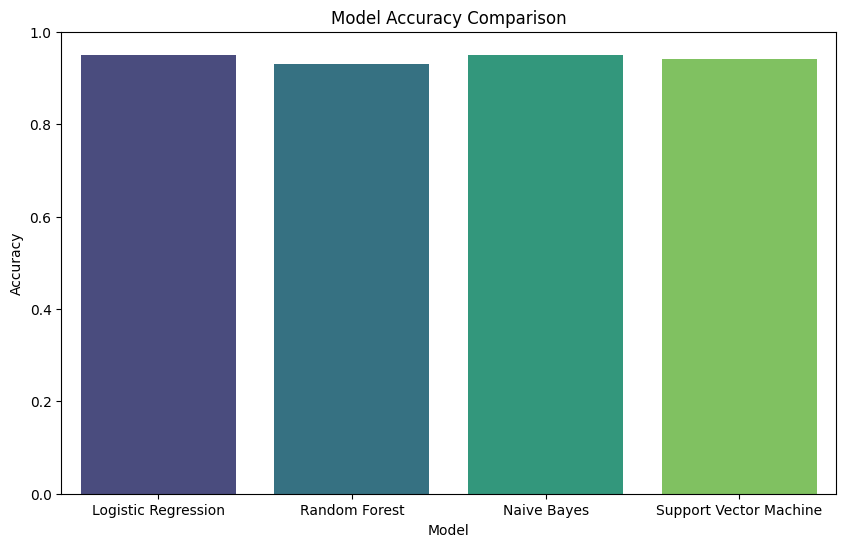

In [13]:
# Plot accuracy comparison
accuracies = [results[name]["accuracy"] for name in classifiers.keys()]
plt.figure(figsize=(10, 6))
sns.barplot(x=list(classifiers.keys()), y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.show()

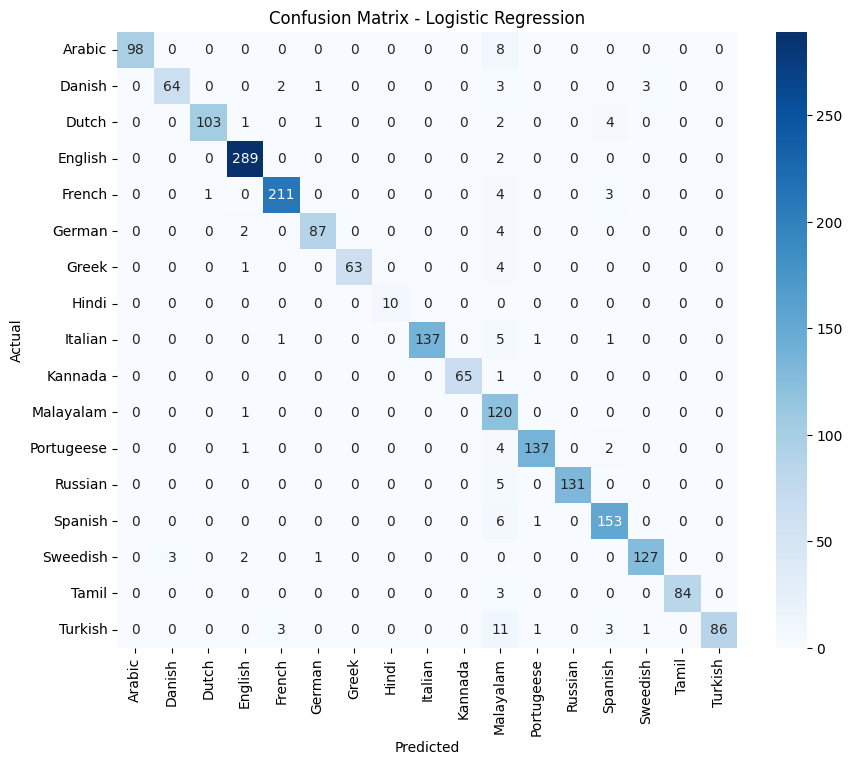

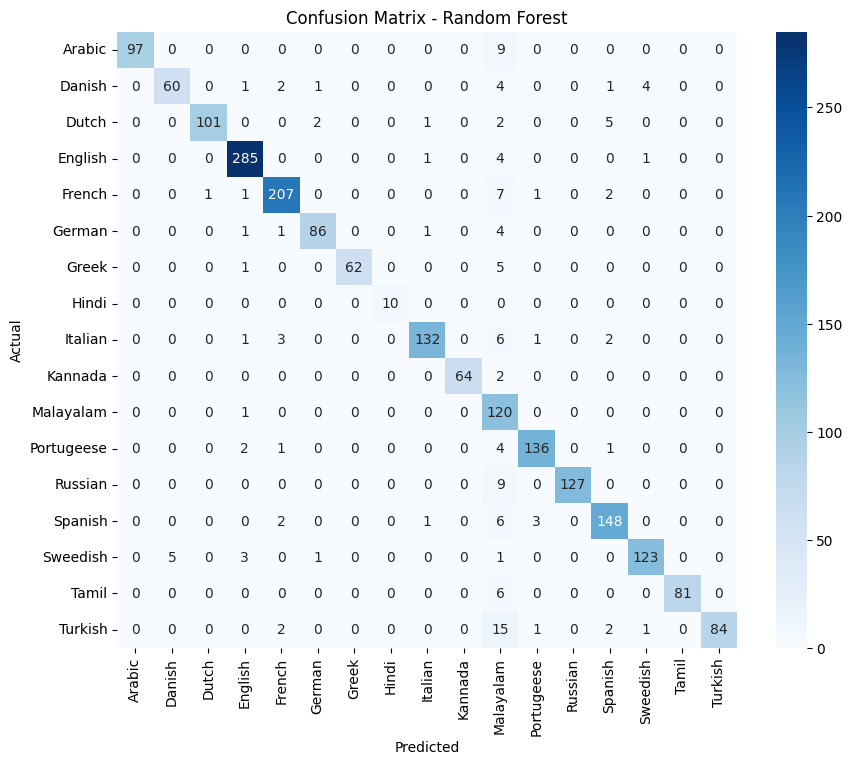

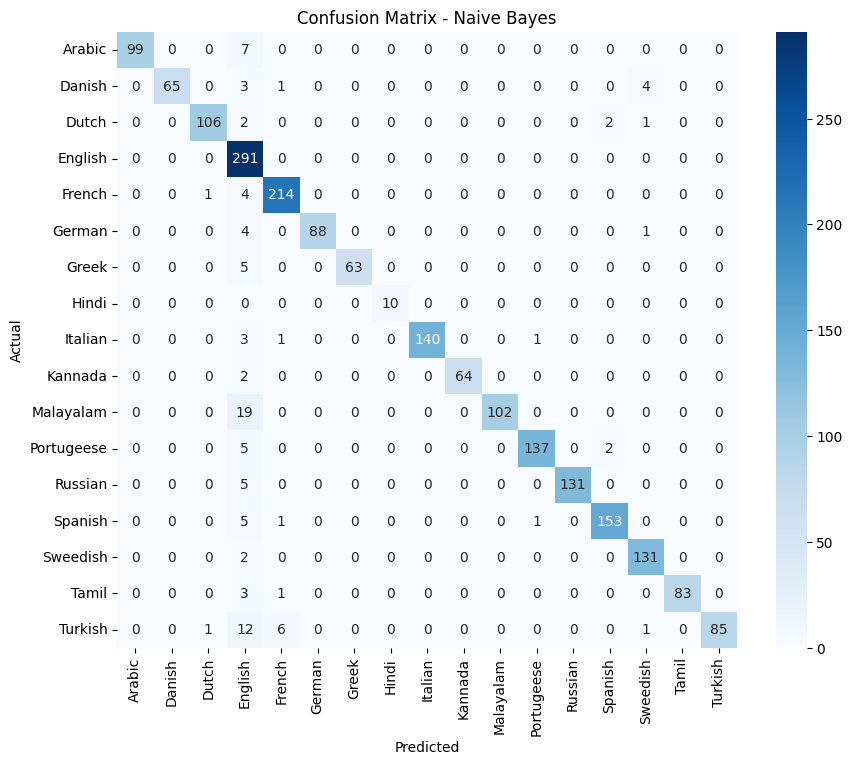

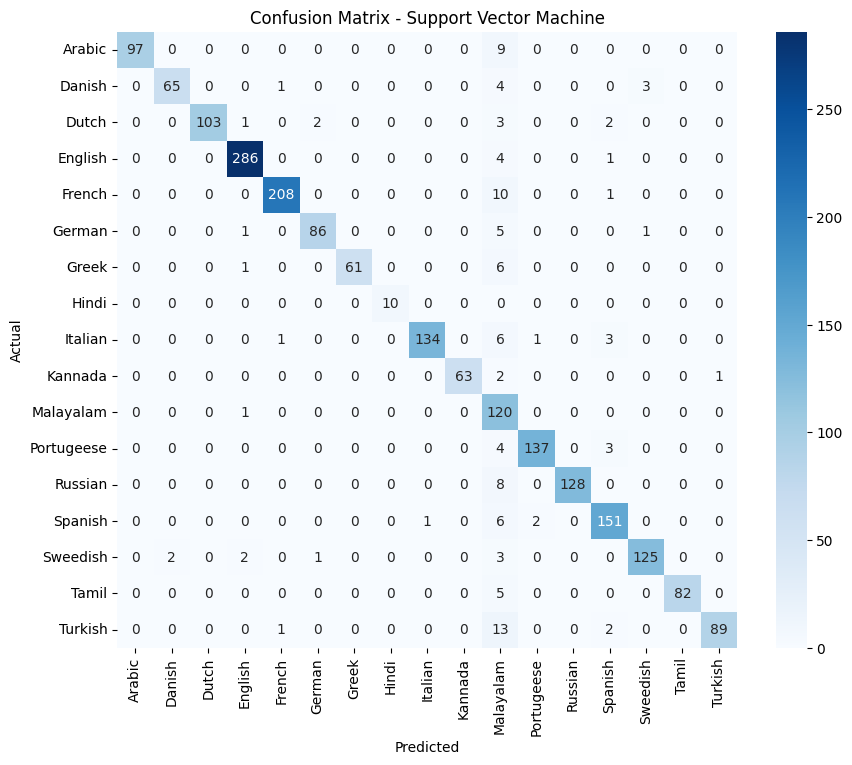

In [14]:
# Plot confusion matrix for each model
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [16]:
# Get user input
user_input = input("Enter text: ")

# Preprocess the user input
preprocessed_input = user_input.translate(str.maketrans("", "", string.punctuation)).lower()

# Vectorize the preprocessed input
X_user = vectorizer.transform([preprocessed_input])

# Use the trained classifier to predict the language of the user input
predicted_language = clf.predict(X_user)[0]

# Print the predicted language to the screen
print("The language is:", predicted_language)

Enter text: Train a logistic regression classifier on the training data
The language is: English
